In [16]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [17]:
# you need to load your dataframe
df = pd.read_csv("Treasury Squeeze raw score data.csv")
df.drop(['rowindex','contract'],axis=1,inplace=True)
df

,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313,True
1,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000,False
2,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676,False
3,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000,True
4,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025,False
...,...,...,...,...,...,...,...,...,...,...
895,0.850482,0.106219,1.000000,1.000000,0.143183,0.039113,1.000000,0.942108,0.879261,False
896,1.000000,0.048638,0.193619,1.000000,0.889959,0.129162,0.137239,1.000000,1.000000,False
897,0.914224,0.080241,1.000000,0.000310,0.010017,0.095047,1.000000,0.179392,0.973741,True
898,0.188539,0.677024,0.889069,0.172883,0.122178,0.761967,0.159114,0.967726,0.087070,True


In [18]:
X = df[['price_crossing','price_distortion']] # specify the columns you want to use
y = df['squeeze']

In [19]:
print('Class labels:', np.unique(y))


Class labels: [False  True]


In [20]:
#data Split

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)
print( X_train.shape, y_train.shape)



(630, 2) (630,)


In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

(630, 1) (630,)


In [22]:
#tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [23]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['True', 
                                        'False'],
                           feature_names=['price_crossing', 
                                          'price_distortion'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

True

In [25]:
#KNN
from sklearn.neighbors import KNeighborsClassifier


In [26]:
k_range = range(1,26)

scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

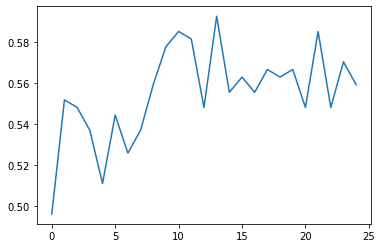

In [29]:
plt.plot(scores)

In [28]:
print(scores)

[0.4962962962962963, 0.5518518518518518, 0.5481481481481482, 0.5370370370370371, 0.5111111111111111, 0.5444444444444444, 0.5259259259259259, 0.5370370370370371, 0.5592592592592592, 0.5777777777777777, 0.5851851851851851, 0.5814814814814815, 0.5481481481481482, 0.5925925925925926, 0.5555555555555556, 0.562962962962963, 0.5555555555555556, 0.5666666666666667, 0.562962962962963, 0.5666666666666667, 0.5481481481481482, 0.5851851851851851, 0.5481481481481482, 0.5703703703703704, 0.5592592592592592]


In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=10)

In [35]:
from mlxtend.plotting import plot_decision_regions

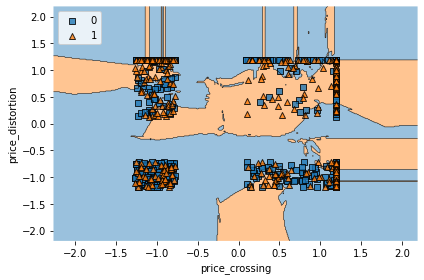

In [39]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined.astype(np.int_), 
                      clf=knn)

plt.xlabel('price_crossing')
plt.ylabel('price_distortion')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print("My name is Gabriel Regalado")
print("My NetID is: gregal2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")